# EDA


See [README.md](../../README.md#Dataset) for information on dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
!ls -l ../../data

total 22844
-rwxrwxrwx 1 andre andre   429713 Nov 14 15:38 sample_submission.csv
-rwxrwxrwx 1 andre andre  9134692 Nov 14 15:38 test.csv
-rwxrwxrwx 1 andre andre 13820236 Nov 14 15:38 train.csv


Peaking at data:

In [3]:
df = pd.read_csv("../../data/train.csv")
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


Reading it transposed instead:

In [4]:
df.head().T

,0,1,2,3,4
policy_id,ID00001,ID00002,ID00003,ID00004,ID00005
policy_tenure,0.515874,0.672619,0.84111,0.900277,0.596403
age_of_car,0.05,0.02,0.02,0.11,0.11
age_of_policyholder,0.644231,0.375,0.384615,0.432692,0.634615
area_cluster,C1,C2,C3,C4,C5
population_density,4990,27003,4076,21622,34738
make,1,1,1,1,2
segment,A,A,A,C1,A
model,M1,M1,M1,M2,M3
fuel_type,CNG,CNG,CNG,Petrol,Petrol


It may be useful to convert `policy_id` into integers and separate the values of `max_torque` and `max_power`. Additionally, the `make` field may make more sense categorically rather than numerically.

## Cleanup

Checking that fields are properly typed:

In [5]:
df.dtypes

policy_id                            object
policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type               

Checking for missing values:

In [6]:
df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

No issues. Also, let's quickly get rid of capitalization and spaces

In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [8]:
df.head().T

,0,1,2,3,4
policy_id,id00001,id00002,id00003,id00004,id00005
policy_tenure,0.515874,0.672619,0.84111,0.900277,0.596403
age_of_car,0.05,0.02,0.02,0.11,0.11
age_of_policyholder,0.644231,0.375,0.384615,0.432692,0.634615
area_cluster,c1,c2,c3,c4,c5
population_density,4990,27003,4076,21622,34738
make,1,1,1,1,2
segment,a,a,a,c1,a
model,m1,m1,m1,m2,m3
fuel_type,cng,cng,cng,petrol,petrol


Let's look at the claim rate:

In [9]:
df['is_claim'].value_counts(normalize=True)

0    0.936032
1    0.063968
Name: is_claim, dtype: float64

It is dramatically one-sided. To evaluate we will use more metrics than accuracy, like **precision** and **recall**.

Moving on to cleaning up fields. The `policy_id` may not be useful but let's clean it up.

Confirming the range:

In [10]:
df.tail()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
58587,id58588,0.355089,0.13,0.644231,c8,8794,2,a,m3,petrol,...,no,yes,yes,yes,no,yes,yes,yes,2,0
58588,id58589,1.199642,0.02,0.519231,c14,7788,1,a,m1,cng,...,no,no,no,yes,no,no,no,yes,0,0
58589,id58590,1.162273,0.05,0.451923,c5,34738,1,a,m1,cng,...,no,no,no,yes,no,no,no,yes,0,0
58590,id58591,1.236307,0.14,0.557692,c8,8794,1,b2,m6,petrol,...,yes,yes,yes,yes,yes,yes,yes,yes,2,0
58591,id58592,0.124429,0.02,0.442308,c8,8794,3,c2,m4,diesel,...,yes,yes,yes,yes,yes,no,yes,yes,3,0


In [11]:
df["policy_id"] = df["policy_id"].str[2:] # Removes the first two letters (id)
df["policy_id"] = df["policy_id"].astype("int")

In [12]:
categorical.remove("policy_id")

## Exploration:

Separating out the `max_torque` and `max_power` fields:

In [13]:
df[['max_torque_nm','max_torque_rpm']] = df['max_torque'].str.split("@", expand=True)
df['max_torque_rpm'] = df["max_torque_rpm"].str[:-3].astype("int")
df['max_torque_nm'] = df["max_torque_nm"].str[:-2].astype("float")
print(df[['max_torque_nm','max_torque_rpm']])

       max_torque_nm  max_torque_rpm
0               60.0            3500
1               60.0            3500
2               60.0            3500
3              113.0            4400
4               91.0            4250
...              ...             ...
58587           91.0            4250
58588           60.0            3500
58589           60.0            3500
58590          113.0            4400
58591          250.0            2750

[58592 rows x 2 columns]


In [14]:
df[['max_power_bhp','max_power_rpm']] = df['max_power'].str.split("@", expand=True)
df['max_power_rpm'] = df["max_power_rpm"].str[:-3].astype("int")
df['max_power_bhp'] = df["max_power_bhp"].str[:-3].astype("float")
print(df[['max_power_bhp','max_power_rpm']])

       max_power_bhp  max_power_rpm
0              40.36           6000
1              40.36           6000
2              40.36           6000
3              88.50           6000
4              67.06           5500
...              ...            ...
58587          67.06           5500
58588          40.36           6000
58589          40.36           6000
58590          88.50           6000
58591         113.45           4000

[58592 rows x 2 columns]


Converting the `make` field to categorical:

In [15]:
# Later this will automatically be converted to 
# one-hot encoding, so this is fine
df["make"] = df["make"].astype("str")
categorical.append("make")

## Feature Importance

Here we observe the **risk ratios** of the categorical variables. Ratios lower than 1 are less likely to claim, greater than 1 are more likely to claim

In [16]:
claim_rate = df['is_claim'].mean()

# Need ipython display to make this look nice.
for category in categorical:
    print(category)
    df_group = df.groupby(category)['is_claim'].agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - claim_rate
    df_group['risk'] = df_group['mean'] / claim_rate
    display(df_group)
    print()
    print()

area_cluster


,mean,count,diff,risk
area_cluster,,,,
c1,0.051771,1468,-0.012197,0.809331
c10,0.046910,3155,-0.017058,0.733333
c11,0.059406,1212,-0.004562,0.928685
c12,0.054751,1589,-0.009216,0.855922
c13,0.056968,3423,-0.007000,0.890567
c14,0.076776,3660,0.012808,1.200229
c15,0.049287,771,-0.014681,0.770492
c16,0.057357,401,-0.006611,0.896648
c17,0.038618,492,-0.025350,0.603708




segment


,mean,count,diff,risk
segment,,,,
a,0.060389,17321,-0.003579,0.944055
b1,0.058471,4173,-0.005497,0.914072
b2,0.068581,18314,0.004614,1.072124
c1,0.064099,3557,0.000131,1.002051
c2,0.064275,14018,0.000307,1.004795
utility,0.060380,1209,-0.003587,0.943920




model


,mean,count,diff,risk
model,,,,
m1,0.061413,14948,-0.002555,0.960060
m10,0.060380,1209,-0.003587,0.943920
m11,0.041322,363,-0.022645,0.645986
m2,0.074074,1080,0.010106,1.157990
m3,0.053940,2373,-0.010028,0.843240
m4,0.064275,14018,0.000307,1.004795
m5,0.072591,1598,0.008623,1.134802
m6,0.068162,13776,0.004194,1.065568
m7,0.068367,2940,0.004400,1.068778




fuel_type


,mean,count,diff,risk
fuel_type,,,,
cng,0.060748,20330,-0.003220,0.949660
diesel,0.064862,17730,0.000894,1.013976
petrol,0.066384,20532,0.002416,1.037775




max_torque


,mean,count,diff,risk
max_torque,,,,
113nm@4400rpm,0.068555,17796,0.004587,1.071707
170nm@4000rpm,0.041322,363,-0.022645,0.645986
200nm@1750rpm,0.062914,2114,-0.001054,0.983525
200nm@3000rpm,0.072591,1598,0.008623,1.134802
250nm@2750rpm,0.064275,14018,0.000307,1.004795
60nm@3500rpm,0.061413,14948,-0.002555,0.960060
82.1nm@3400rpm,0.058471,4173,-0.005497,0.914072
85nm@3000rpm,0.060380,1209,-0.003587,0.943920
91nm@4250rpm,0.053940,2373,-0.010028,0.843240




max_power


,mean,count,diff,risk
max_power,,,,
113.45bhp@4000rpm,0.064275,14018,0.000307,1.004795
118.36bhp@5500rpm,0.041322,363,-0.022645,0.645986
40.36bhp@6000rpm,0.061413,14948,-0.002555,0.960060
55.92bhp@5300rpm,0.058471,4173,-0.005497,0.914072
61.68bhp@6000rpm,0.060380,1209,-0.003587,0.943920
67.06bhp@5500rpm,0.053940,2373,-0.010028,0.843240
88.50bhp@6000rpm,0.068555,17796,0.004587,1.071707
88.77bhp@4000rpm,0.072591,1598,0.008623,1.134802
97.89bhp@3600rpm,0.062914,2114,-0.001054,0.983525




engine_type


,mean,count,diff,risk
engine_type,,,,
1.0_sce,0.053940,2373,-0.010028,0.843240
1.2_l_k12n_dualjet,0.074074,1080,0.010106,1.157990
1.2_l_k_series_engine,0.068367,2940,0.004400,1.068778
1.5_l_u2_crdi,0.064275,14018,0.000307,1.004795
1.5_turbocharged_revotorq,0.072591,1598,0.008623,1.134802
1.5_turbocharged_revotron,0.041322,363,-0.022645,0.645986
f8d_petrol_engine,0.061413,14948,-0.002555,0.960060
g12b,0.060380,1209,-0.003587,0.943920
i-dtec,0.062914,2114,-0.001054,0.983525




is_esc


,mean,count,diff,risk
is_esc,,,,
no,0.063472,40191,-0.000496,0.992248
yes,0.065051,18401,0.001083,1.016931




is_adjustable_steering


,mean,count,diff,risk
is_adjustable_steering,,,,
no,0.059742,23066,-0.004226,0.933933
yes,0.066712,35526,0.002744,1.042895




is_tpms


,mean,count,diff,risk
is_tpms,,,,
no,0.063871,44574,-0.000096,0.998492
yes,0.064275,14018,0.000307,1.004795




is_parking_sensors


,mean,count,diff,risk
is_parking_sensors,,,,
no,0.053940,2373,-0.010028,0.843240
yes,0.064391,56219,0.000423,1.006617




is_parking_camera


,mean,count,diff,risk
is_parking_camera,,,,
no,0.064138,35704,0.000171,1.002668
yes,0.063702,22888,-0.000266,0.995837




rear_brakes_type


,mean,count,diff,risk
rear_brakes_type,,,,
disc,0.064275,14018,0.000307,1.004795
drum,0.063871,44574,-0.000096,0.998492




transmission_type


,mean,count,diff,risk
transmission_type,,,,
automatic,0.064181,20411,0.000213,1.003335
manual,0.063854,38181,-0.000114,0.998217




steering_type


,mean,count,diff,risk
steering_type,,,,
electric,0.066873,23881,0.002905,1.045421
manual,0.060380,1209,-0.003587,0.943920
power,0.062026,33502,-0.001942,0.969647




is_front_fog_lights


,mean,count,diff,risk
is_front_fog_lights,,,,
no,0.060574,24664,-0.003394,0.946947
yes,0.066435,33928,0.002467,1.038567




is_rear_window_wiper


,mean,count,diff,risk
is_rear_window_wiper,,,,
no,0.063554,41634,-0.000414,0.993529
yes,0.064984,16958,0.001016,1.015888




is_rear_window_washer


,mean,count,diff,risk
is_rear_window_washer,,,,
no,0.063554,41634,-0.000414,0.993529
yes,0.064984,16958,0.001016,1.015888




is_rear_window_defogger


,mean,count,diff,risk
is_rear_window_defogger,,,,
no,0.063503,38077,-0.000465,0.992733
yes,0.064831,20515,0.000863,1.013489




is_brake_assist


,mean,count,diff,risk
is_brake_assist,,,,
no,0.061026,26415,-0.002942,0.954011
yes,0.066383,32177,0.002415,1.037754




is_power_door_locks


,mean,count,diff,risk
is_power_door_locks,,,,
no,0.061336,16157,-0.002632,0.958852
yes,0.064970,42435,0.001002,1.015667




is_central_locking


,mean,count,diff,risk
is_central_locking,,,,
no,0.061336,16157,-0.002632,0.958852
yes,0.064970,42435,0.001002,1.015667




is_power_steering


,mean,count,diff,risk
is_power_steering,,,,
no,0.060380,1209,-0.003587,0.943920
yes,0.064043,57383,0.000076,1.001182




is_driver_seat_height_adjustable


,mean,count,diff,risk
is_driver_seat_height_adjustable,,,,
no,0.060862,24301,-0.003106,0.951443
yes,0.066169,34291,0.002201,1.034411




is_day_night_rear_view_mirror


,mean,count,diff,risk
is_day_night_rear_view_mirror,,,,
no,0.062436,36309,-0.001531,0.976059
yes,0.066463,22283,0.002495,1.039011




is_ecw


,mean,count,diff,risk
is_ecw,,,,
no,0.061336,16157,-0.002632,0.958852
yes,0.064970,42435,0.001002,1.015667




is_speed_alert


,mean,count,diff,risk
is_speed_alert,,,,
no,0.041322,363,-0.022645,0.645986
yes,0.064109,58229,0.000141,1.002207




make


,mean,count,diff,risk
make,,,,
1,0.064392,38126,0.000424,1.006628
2,0.053940,2373,-0.010028,0.843240
3,0.064275,14018,0.000307,1.004795
4,0.066803,1961,0.002835,1.044317
5,0.062914,2114,-0.001054,0.983525


`area_cluster` has some predictive power, some are not very likely to claim (c17: ~0.60 risk), and some are much more likely (c18: ~1.68).

`segment`, `model`, `fuel_type` do not significantly affect likelihood to claim.

Notably, `max_torque`, `max_power`, `engine_type`, and `model` share some metrics and predictive power with low likelihood to claim. Logically, as these are all correlated variables in this domain, these share many metrics and there is likely a lot of mutual information.

`fuel_type`, `is_esc`, `is_adjustable_steering`, `is_tpms`, `is_parking_camera`, `rear_brakes_type`, `transmission_type`, `steering_type`, `is_front_fog_lights`, `is_rear_window_wiper`, `is_rear_window_washer`, `is_rear_window_defogger`, `is_brake_assist`, `is_power_door_locks`, `is_central_locking`, `is_power_steering`, `is_driver_seat_height_adjustable`, `is_day_night_rear_view_mirror`, `is_ecw`, mostly metrics related to specific car features, do not significantly affect likelihood to claim.

`make` and `is_parking_sensors` slightly affect (make #2: ~0.84, no parking sensor: ~0.84) and `is_speed_alert` significantly affects (no: ~0.65) likelihood to claim, which seems to go against real-life logic. The 'no' option for `is_speed_alert` has the same metrics for an engine/model type (as in the `max_torque`, `max_power`, `engine_type`, and `model` correlation), potentially capturing a specific vehicle make and model.



### Mutual Information

Now let's take a look at the mutual information of our variables. This lets us see the similarity between two fields, namely between a given categorical field and the target field.

This information can be ranked.

In [17]:
from sklearn.metrics import mutual_info_score

In [18]:
def mutual_info_claim_score(series):
    return mutual_info_score(series, df['is_claim'])

In [19]:
# .apply() variable allows us to run a function on a Pandas Series
mi = df[categorical].apply(mutual_info_claim_score)  # only applies to categorical variables
mi.sort_values(ascending=False)

area_cluster                        8.347961e-04
model                               1.743290e-04
engine_type                         1.743290e-04
max_torque                          1.697391e-04
max_power                           1.697391e-04
segment                             1.074613e-04
is_adjustable_steering              9.758521e-05
is_front_fog_lights                 7.025291e-05
is_brake_assist                     5.949700e-05
is_driver_seat_height_adjustable    5.736150e-05
fuel_type                           4.942676e-05
steering_type                       4.876553e-05
make                                3.952166e-05
is_parking_sensors                  3.723955e-05
is_day_night_rear_view_mirror       3.176978e-05
is_speed_alert                      3.027682e-05
is_power_door_locks                 2.220661e-05
is_central_locking                  2.220661e-05
is_ecw                              2.220661e-05
is_esc                              4.471884e-06
is_rear_window_wiper

This is very low mutual information across the board. Still, there is some order and we can plot this for clarity:

<function matplotlib.pyplot.show(close=None, block=None)>

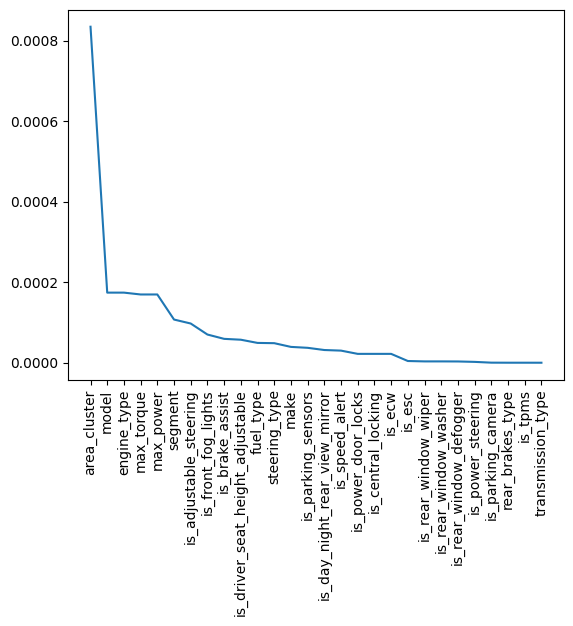

In [20]:
mi = mi.sort_values(ascending=False)
plt.plot(mi)
plt.xticks(rotation=90)
plt.show

Keeping in mind none have significant explanatory power:
- `area_cluster` has the most by a large margin at ~8.35e-04
- `model` has dramatically less at ~1.74e-04, dropping slightly until `segment`, which has about ~1.07e-04 mutual information
- This continues to decrease steadily until `is_esc` (~2.22e-05 to ~4.47e-06) (whether electronic stability control is present), where there is another steady decrease for the rest of the variables.

We can potentially drop the variables from `is_esc` and onward, or `segment` and onward as they may just add noise.

### Correlation

Here we use Pearson's correlation, to see the dependency between numerical variables and the target variable.

Correlations are in the range *r*, -1 <= *r* <= 1, correlation is higher toward -1 (negative correlation) or 1 (positive correlation), with none at *r* = 0.

First, getting just the numerical columns:

In [21]:
numerical = [field for field in df.columns.values if field not in categorical]
numerical.remove('is_claim')
print(df[numerical].dtypes)
display(df[numerical].head().T)

policy_id                int64
policy_tenure          float64
age_of_car             float64
age_of_policyholder    float64
population_density       int64
airbags                  int64
displacement             int64
cylinder                 int64
gear_box                 int64
turning_radius         float64
length                   int64
width                    int64
height                   int64
gross_weight             int64
ncap_rating              int64
max_torque_nm          float64
max_torque_rpm           int64
max_power_bhp          float64
max_power_rpm            int64
dtype: object


,0,1,2,3,4
policy_id,1.000000,2.000000,3.000000,4.000000,5.000000
policy_tenure,0.515874,0.672619,0.841110,0.900277,0.596403
age_of_car,0.050000,0.020000,0.020000,0.110000,0.110000
age_of_policyholder,0.644231,0.375000,0.384615,0.432692,0.634615
population_density,4990.000000,27003.000000,4076.000000,21622.000000,34738.000000
airbags,2.000000,2.000000,2.000000,2.000000,2.000000
displacement,796.000000,796.000000,796.000000,1197.000000,999.000000
cylinder,3.000000,3.000000,3.000000,4.000000,3.000000
gear_box,5.000000,5.000000,5.000000,5.000000,5.000000
turning_radius,4.600000,4.600000,4.600000,4.800000,5.000000


Now checking the correlation of each column with the target column. Sorting for visibility

In [22]:
df[numerical].corrwith(df['is_claim']).sort_values(ascending=False)

policy_tenure          0.078747
age_of_policyholder    0.022435
cylinder               0.013434
width                  0.009947
max_power_bhp          0.007698
displacement           0.007678
length                 0.006495
max_torque_rpm         0.004781
max_torque_nm          0.004294
gross_weight           0.003894
ncap_rating            0.003800
airbags                0.002789
turning_radius         0.002724
max_power_rpm          0.000095
gear_box              -0.000635
height                -0.002024
policy_id             -0.002960
population_density    -0.017808
age_of_car            -0.028172
dtype: float64

While not very high, `policy_tenure`, `age_of_policyholder`, and `cylinder` show some positive correlation and `population_density` and `age_of_car` show some negative correlation.

Let's look at the largest. So, `policy_tenure`.

In [23]:
df['policy_tenure'].describe()

count    58592.000000
mean         0.611246
std          0.414156
min          0.002735
25%          0.210250
50%          0.573792
75%          1.039104
max          1.396641
Name: policy_tenure, dtype: float64

In [24]:
tenure_low = df[df['policy_tenure'] <= 0.3]['is_claim'].mean()
tenure_low

0.03916201705442678

In [25]:
tenure_med = df[(df['policy_tenure'] > 0.3) & (df['policy_tenure'] <= 0.9)]['is_claim'].mean()
tenure_med

0.06673138827857544

In [26]:
tenure_max = df[df['policy_tenure'] > 0.9]['is_claim'].mean()
tenure_max

0.08480247715127603

It seems that the longer the policy, the more likely to claim

Let's take a look at `age_of_car`. 

In [27]:
df['age_of_car'].describe()

count    58592.000000
mean         0.069424
std          0.056721
min          0.000000
25%          0.020000
50%          0.060000
75%          0.110000
max          1.000000
Name: age_of_car, dtype: float64

These values are all quite *low*.

In [28]:
age_low = df[df['age_of_car'] <= 0.1]['is_claim'].mean()
age_low

0.06736817490938851

In [29]:
age_med = df[(df['age_of_car'] > 0.1) & (df['age_of_car'] <= 0.3)]['is_claim'].mean()
age_med

0.054782332380044485

In [30]:
age_high = df[df['age_of_car'] > 0.3]['is_claim'].mean()
age_high

0.05434782608695652

It seems the lower the age, the more likely to claim in the next 6 months. But not by much.

## Data Cleanup Standardization

Encapsulating the changes made over the course of EDA

In [31]:
def cleanup_dataframe(df):
    # Removing uppercase and spaces
    df.columns = df.columns.str.lower().str.replace(' ', '_')

    categorical = list(df.dtypes[df.dtypes == 'object'].index)

    for c in categorical:
        df[c] = df[c].str.lower().str.replace(' ', '_')

    # Cleaning up policy variable
    df["policy_id"] = df["policy_id"].str[2:] # Removes the first two letters (id)
    df["policy_id"] = df["policy_id"].astype("int")

    # Adding variables for the individual values of max_torque and max_power
    df[['max_torque_nm','max_torque_rpm']] = df['max_torque'].str.split("@", expand=True)
    df['max_torque_rpm'] = df["max_torque_rpm"].str[:-3].astype("int")
    df['max_torque_nm'] = df["max_torque_nm"].str[:-2].astype("float")

    df[['max_power_bhp','max_power_rpm']] = df['max_power'].str.split("@", expand=True)
    df['max_power_rpm'] = df["max_power_rpm"].str[:-3].astype("int")
    df['max_power_bhp'] = df["max_power_bhp"].str[:-3].astype("float")

    return df

## Modeling and Validation

In [32]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

In [33]:
df_train, df_val = train_test_split(df, test_size=0.25, random_state=1)

In [34]:
df_test = pd.read_csv("../../data/test.csv")
df_test = cleanup_dataframe(df_test)

In [35]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
y_train = df_train['is_claim']

# Don't fit on validation dataset
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_val = df_val['is_claim']

First we experiment with sklearn's Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [37]:
model = LogisticRegression(
        solver='liblinear',
        max_iter=1000,
    )
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]

In [38]:
C = np.linspace(0.1, 1.0, 10)
C

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [39]:
# Creates 21 values equally spaced between 0 and 1 inclusive
thresholds = np.linspace(0, 1, 11)

scores = []

print("Acccuracy Scores by Threshold")
print("-----------------------------")
# Get the accuracy for each thrshold
for t in thresholds:
    # Use accuracy with decision boundary t from thresholds
    score = accuracy_score(y_val, y_pred >= t)
    print('t: %.2f accuracy: %.3f' % (t, score))
    scores.append(score)

Acccuracy Scores by Threshold
-----------------------------
t: 0.00 accuracy: 0.064
t: 0.10 accuracy: 0.936
t: 0.20 accuracy: 0.936
t: 0.30 accuracy: 0.936
t: 0.40 accuracy: 0.936
t: 0.50 accuracy: 0.936
t: 0.60 accuracy: 0.936
t: 0.70 accuracy: 0.936
t: 0.80 accuracy: 0.936
t: 0.90 accuracy: 0.936
t: 1.00 accuracy: 0.936


In [40]:
for c in C:
    model = LogisticRegression(
            solver='liblinear',
            max_iter=1000,
            C=c,
        )
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    acc = accuracy_score(y_val, y_pred >= 0.10)
    auc = roc_auc_score(y_val, y_pred >= 0.10)
    print(f"C: {c}")
    print(f"Acc: {acc}")
    print(f"AUC: {auc}")

C: 0.1
Acc: 0.9358956854178044
AUC: 0.5
C: 0.2
Acc: 0.9358956854178044
AUC: 0.5
C: 0.30000000000000004
Acc: 0.9358956854178044
AUC: 0.5
C: 0.4
Acc: 0.9358956854178044
AUC: 0.5
C: 0.5
Acc: 0.9358956854178044
AUC: 0.5
C: 0.6
Acc: 0.9358956854178044
AUC: 0.5
C: 0.7000000000000001
Acc: 0.9358956854178044
AUC: 0.5
C: 0.8
Acc: 0.9358956854178044
AUC: 0.5
C: 0.9
Acc: 0.9358956854178044
AUC: 0.5
C: 1.0
Acc: 0.9358956854178044
AUC: 0.5


Logistic Regression is not affected by regularization. Need more data or larger model.

Trying Random Forest Classifier:

In [41]:
scores = []

# Range 10, 20, ... 200
for n in range(10, 201, 10):
    rf = RandomForestClassifier(
        n_estimators=n, 
        random_state=1,
    )
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

First tuning number of estimators

In [42]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
df_scores

,n_estimators,auc
0,10,0.530276
1,20,0.548455
2,30,0.557259
3,40,0.560714
4,50,0.566382
5,60,0.569460
6,70,0.571399
7,80,0.572430
8,90,0.575573
9,100,0.576669


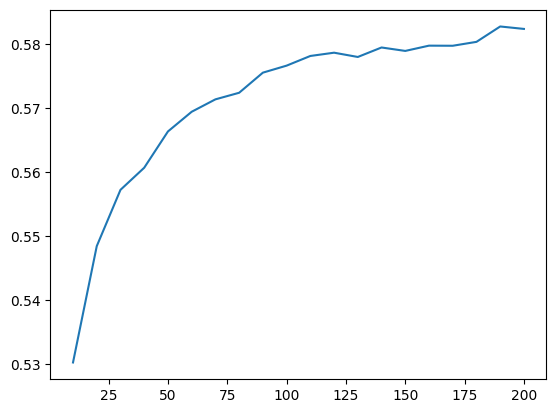

In [43]:
plt.plot(df_scores.n_estimators, df_scores.auc)

Increases until about ~185 estimators. We will continue with that

Tuning max tree depth:

In [44]:
scores = []

for d in [4, 5, 6, 7, 8]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [45]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,4,10,0.610967
1,4,20,0.623438
2,4,30,0.636642
3,4,40,0.631990
4,4,50,0.629078


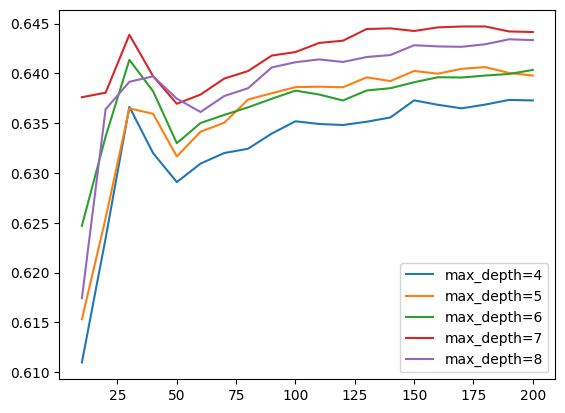

In [46]:
for d in [4, 5, 6, 7, 8]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

A max depth of 7 seems ideal.

Tuning number of minimum samples per leaf:

In [47]:
# May take some time
max_depth = 5
scores = []

for s in [1, 2, 3, 4, 5]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [48]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.615306
1,1,20,0.625452
2,1,30,0.636483
3,1,40,0.635938
4,1,50,0.631654


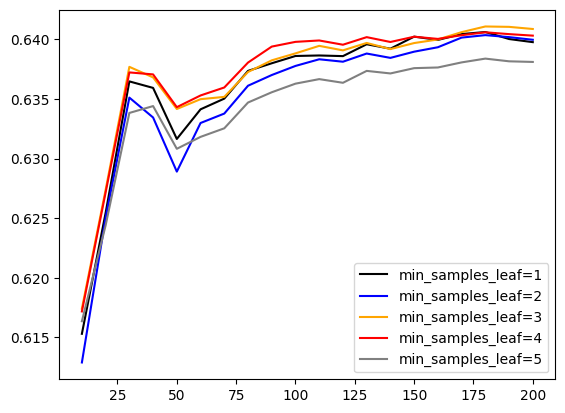

In [49]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 2, 3, 4, 5]

# We need to zip values and colors to associate the colors with the different data streams
for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [50]:
# Using 200 estimators as there is not much difference between 100 and 200
rf = RandomForestClassifier(n_estimators=185,
                            max_depth=7,
                            min_samples_leaf=3,
                            random_state=1,
                            )
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=3, n_estimators=185,
                       random_state=1)

In [51]:
y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

0.6419337249667924

In [52]:
import xgboost as xgb

Converting to xgb DMatrix format:

In [53]:
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [54]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [56]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [57]:
space={'eta': hp.choice("eta", [0.01, 0.05, 0.1, 0.3, 0.5, 1.0]),
        'max_depth': hp.choice("max_depth", list(np.linspace(1,10,10))),
        'min_child_weight': hp.choice("min_child_weight", [1, 5, 10, 15]),
        'n_estimators': hp.quniform("n_estimators", 100, 200, 21),
        'seed': 0
    }

In [58]:
def objective(space):
    print(int(space['max_depth']))
    clf=xgb.XGBClassifier(
        eta = space['eta'], 
        max_depth = int(space['max_depth']), 
        min_child_weight=int(space['min_child_weight']),
        n_estimators=int(space['n_estimators'])
    )
    
    evaluation = [( X_train, y_train), (X_val, y_val)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_val)
    auc = roc_auc_score(y_val, y_pred)
    acc = accuracy_score(y_val, y_pred >= 0.1)
    print ("SCORE:", auc)
    print ("Accuracy:", acc)
    return {'loss': -acc, 'status': STATUS_OK }

In [59]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

8                                                      
  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                 
0.6419337249667924                                     
Accuracy:                                              
0.9287274713271436                                     
6                                                                                 
  1%|          | 1/100 [00:01<02:43,  1.65s/trial, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
0.6419337249667924                                                                
Accuracy:                                                                         
0.9287274713271436                                                                
5                                                                                 
  2%|▏         | 2/100 [00:02<01:36,  1.01trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
0.6419337249667924                                                                
Accuracy:                                                                         
0.9287274713271436                                                                
8                                                                                 
  3%|▎         | 3/100 [00:03<01:32,  1.05trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
0.6419337249667924                                                                
Accuracy:                                                                         
0.9287274713271436                                                                
10                                                                                
  4%|▍         | 4/100 [00:04<01:41,  1.06s/trial, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
0.6419337249667924                                                                
Accuracy:                                                                         
0.9287274713271436                                                                
10                                                                                
  5%|▌         | 5/100 [00:05<01:30,  1.04trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
0.6419337249667924                                                                
Accuracy:                                                                         
0.9287274713271436                                                                
1                                                                                 
  6%|▌         | 6/100 [00:06<01:56,  1.24s/trial, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
0.6419337249667924                                                                
Accuracy:                                                                         
0.9287274713271436                                                                
6                                                                                 
  7%|▋         | 7/100 [00:07<01:27,  1.07trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
0.6419337249667924                                                                
Accuracy:                                                                         
0.9287274713271436                                                                
1                                                                                 
  8%|▊         | 8/100 [00:08<01:22,  1.11trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
0.6419337249667924                                                                
Accuracy:                                                                         
0.9287274713271436                                                                
8                                                                                 
  9%|▉         | 9/100 [00:08<01:16,  1.20trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                            
0.6419337249667924                                                                
Accuracy:                                                                         
0.9287274713271436                                                                
7                                                                                  
 10%|█         | 10/100 [00:09<01:09,  1.30trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
5                                                                                  
 11%|█         | 11/100 [00:10<01:12,  1.22trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
10                                                                                 
 12%|█▏        | 12/100 [00:10<01:04,  1.36trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
8                                                                                  
 13%|█▎        | 13/100 [00:11<01:09,  1.26trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
2                                                                                  
 14%|█▍        | 14/100 [00:12<01:18,  1.10trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
2                                                                                  
 15%|█▌        | 15/100 [00:13<01:04,  1.31trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
1                                                                                  
 16%|█▌        | 16/100 [00:13<00:56,  1.49trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
8                                                                                  
 17%|█▋        | 17/100 [00:14<00:48,  1.72trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
2                                                                                  
 18%|█▊        | 18/100 [00:14<00:50,  1.62trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
7                                                                                  
 19%|█▉        | 19/100 [00:15<00:52,  1.55trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
3                                                                                  
 20%|██        | 20/100 [00:16<00:55,  1.45trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
9                                                                                  
 21%|██        | 21/100 [00:16<00:50,  1.56trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
7                                                                                  
 22%|██▏       | 22/100 [00:17<00:47,  1.65trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
3                                                                                  
 23%|██▎       | 23/100 [00:18<00:48,  1.59trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
9                                                                                  
 24%|██▍       | 24/100 [00:18<00:44,  1.70trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
4                                                                                  
 25%|██▌       | 25/100 [00:19<00:42,  1.76trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
3                                                                                  
 26%|██▌       | 26/100 [00:19<00:46,  1.59trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
9                                                                                  
 27%|██▋       | 27/100 [00:20<00:43,  1.66trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
4                                                                                  
 28%|██▊       | 28/100 [00:20<00:41,  1.74trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
3                                                                                  
 29%|██▉       | 29/100 [00:21<00:47,  1.48trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
9                                                                                  
 30%|███       | 30/100 [00:22<00:44,  1.58trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
4                                                                                  
 31%|███       | 31/100 [00:22<00:41,  1.64trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
3                                                                                  
 32%|███▏      | 32/100 [00:23<00:46,  1.48trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
9                                                                                  
 33%|███▎      | 33/100 [00:24<00:39,  1.69trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
4                                                                                  
 34%|███▍      | 34/100 [00:24<00:37,  1.74trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
7                                                                                  
 35%|███▌      | 35/100 [00:25<00:42,  1.54trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
6                                                                                  
 36%|███▌      | 36/100 [00:26<00:42,  1.50trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
8                                                                                  
 37%|███▋      | 37/100 [00:26<00:36,  1.72trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
5                                                                                  
 38%|███▊      | 38/100 [00:27<00:36,  1.70trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
8                                                                                  
 39%|███▉      | 39/100 [00:27<00:33,  1.80trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
7                                                                                  
 40%|████      | 40/100 [00:28<00:32,  1.87trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
7                                                                                  
 41%|████      | 41/100 [00:28<00:36,  1.64trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
10                                                                                 
 42%|████▏     | 42/100 [00:29<00:33,  1.72trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
6                                                                                  
 43%|████▎     | 43/100 [00:30<00:33,  1.71trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
9                                                                                  
 44%|████▍     | 44/100 [00:30<00:31,  1.77trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
1                                                                                  
 45%|████▌     | 45/100 [00:31<00:30,  1.80trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
4                                                                                  
 46%|████▌     | 46/100 [00:31<00:25,  2.10trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
4                                                                                  
 47%|████▋     | 47/100 [00:32<00:32,  1.65trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
8                                                                                  
 48%|████▊     | 48/100 [00:33<00:34,  1.51trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
3                                                                                  
 49%|████▉     | 49/100 [00:33<00:31,  1.63trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
5                                                                                  
 50%|█████     | 50/100 [00:34<00:27,  1.80trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
10                                                                                 
 51%|█████     | 51/100 [00:34<00:26,  1.87trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
8                                                                                  
 52%|█████▏    | 52/100 [00:35<00:26,  1.82trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
2                                                                                  
 53%|█████▎    | 53/100 [00:36<00:30,  1.52trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
3                                                                                  
 54%|█████▍    | 54/100 [00:36<00:25,  1.80trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
1                                                                                  
 55%|█████▌    | 55/100 [00:36<00:24,  1.84trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
9                                                                                  
 56%|█████▌    | 56/100 [00:37<00:20,  2.19trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
8                                                                                  
 57%|█████▋    | 57/100 [00:37<00:20,  2.10trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
4                                                                                  
 58%|█████▊    | 58/100 [00:38<00:20,  2.09trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
6                                                                                  
 59%|█████▉    | 59/100 [00:39<00:24,  1.64trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
3                                                                                  
 60%|██████    | 60/100 [00:39<00:25,  1.59trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
5                                                                                  
 61%|██████    | 61/100 [00:40<00:22,  1.77trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
9                                                                                  
 62%|██████▏   | 62/100 [00:40<00:22,  1.67trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
2                                                                                  
 63%|██████▎   | 63/100 [00:41<00:21,  1.70trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
4                                                                                  
 64%|██████▍   | 64/100 [00:42<00:21,  1.66trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
7                                                                                  
 65%|██████▌   | 65/100 [00:42<00:24,  1.41trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
7                                                                                  
 66%|██████▌   | 66/100 [00:43<00:24,  1.39trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
6                                                                                  
 67%|██████▋   | 67/100 [00:44<00:21,  1.56trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
8                                                                                  
 68%|██████▊   | 68/100 [00:44<00:19,  1.61trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
6                                                                                  
 69%|██████▉   | 69/100 [00:45<00:19,  1.60trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
5                                                                                  
 70%|███████   | 70/100 [00:45<00:16,  1.77trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
5                                                                                  
 71%|███████   | 71/100 [00:46<00:17,  1.66trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
10                                                                                 
 72%|███████▏  | 72/100 [00:47<00:17,  1.64trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
10                                                                                 
 73%|███████▎  | 73/100 [00:47<00:16,  1.63trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
10                                                                                 
 74%|███████▍  | 74/100 [00:48<00:16,  1.60trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
2                                                                                  
 75%|███████▌  | 75/100 [00:48<00:15,  1.65trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
2                                                                                  
 76%|███████▌  | 76/100 [00:49<00:12,  1.92trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
2                                                                                  
 77%|███████▋  | 77/100 [00:49<00:10,  2.16trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
1                                                                                  
 78%|███████▊  | 78/100 [00:49<00:09,  2.37trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
1                                                                                  
 79%|███████▉  | 79/100 [00:50<00:08,  2.60trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
8                                                                                  
 80%|████████  | 80/100 [00:50<00:07,  2.75trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
8                                                                                  
 81%|████████  | 81/100 [00:51<00:08,  2.30trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
8                                                                                  
 82%|████████▏ | 82/100 [00:51<00:08,  2.07trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
6                                                                                  
 83%|████████▎ | 83/100 [00:52<00:09,  1.80trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
3                                                                                  
 84%|████████▍ | 84/100 [00:53<00:09,  1.76trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
6                                                                                  
 85%|████████▌ | 85/100 [00:54<00:10,  1.42trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
5                                                                                  
 86%|████████▌ | 86/100 [00:54<00:09,  1.54trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
9                                                                                  
 87%|████████▋ | 87/100 [00:55<00:08,  1.49trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
2                                                                                  
 88%|████████▊ | 88/100 [00:55<00:07,  1.55trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
9                                                                                  
 89%|████████▉ | 89/100 [00:56<00:07,  1.51trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
4                                                                                  
 90%|█████████ | 90/100 [00:57<00:06,  1.57trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
7                                                                                  
 91%|█████████ | 91/100 [00:57<00:05,  1.60trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
7                                                                                  
 92%|█████████▏| 92/100 [00:58<00:05,  1.52trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
7                                                                                  
 93%|█████████▎| 93/100 [00:59<00:04,  1.42trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
6                                                                                  
 94%|█████████▍| 94/100 [00:59<00:04,  1.50trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
8                                                                                  
 95%|█████████▌| 95/100 [01:00<00:03,  1.58trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
8                                                                                  
 96%|█████████▌| 96/100 [01:01<00:02,  1.62trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
8                                                                                  
 97%|█████████▋| 97/100 [01:01<00:01,  1.64trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
5                                                                                  
 98%|█████████▊| 98/100 [01:02<00:01,  1.63trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
5                                                                                  
 99%|█████████▉| 99/100 [01:02<00:00,  1.57trial/s, best loss: -0.9287274713271436]

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/home/andre/.local/share/virtualenvs/tentative_name-cXUp4kcY/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                             
0.6419337249667924                                                                 
Accuracy:                                                                          
0.9287274713271436                                                                 
100%|██████████| 100/100 [01:03<00:00,  1.58trial/s, best loss: -0.9287274713271436]


In [60]:
best_hyperparams

{'eta': 0, 'max_depth': 7, 'min_child_weight': 2, 'n_estimators': 147.0}

In [61]:
xgb_params = {
    'eta': 2, 
    'max_depth': 6,
    'min_child_weight': 0,
    'n_estimators': 126,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

[02:46:18] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.



In [62]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.46697469717234485